# Portfolio 2

## Data driven prediction models of energy use of appliances in a low-energy house.

In [1]:
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.3f' % x)
from pandas import DataFrame
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import RFE
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import calendar
from matplotlib import pyplot as plt
from datetime import timedelta
from datetime import time
from datetime import date
from datetime import datetime
plt.style.use('seaborn')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Loading Data

----

The first dataset is the `complete data` which consists all data of the energy consumption. Then we have two more datasets training and testing datasets which are the subset of the complete data. We wil train a certain set of data and test on other data to check the correctness of the model developed.

We are changing data type of date column to the date for the analysis.

In [2]:
complete_data = pd.read_csv('data/energydata_complete.csv',parse_dates=True)
complete_data["date"]=pd.to_datetime(complete_data["date"])
complete_data.head()

date  Appliances  lights     T1   RH_1     T2   RH_2     T3  \
0 2016-01-11 17:00:00          60      30 19.890 47.597 19.200 44.790 19.790   
1 2016-01-11 17:10:00          60      30 19.890 46.693 19.200 44.722 19.790   
2 2016-01-11 17:20:00          50      30 19.890 46.300 19.200 44.627 19.790   
3 2016-01-11 17:30:00          50      40 19.890 46.067 19.200 44.590 19.790   
4 2016-01-11 17:40:00          60      40 19.890 46.333 19.200 44.530 19.790   

    RH_3     T4  ...     T9   RH_9  T_out  Press_mm_hg  RH_out  Windspeed  \
0 44.730 19.000  ... 17.033 45.530  6.600      733.500  92.000      7.000   
1 44.790 19.000  ... 17.067 45.560  6.483      733.600  92.000      6.667   
2 44.933 18.927  ... 17.000 45.500  6.367      733.700  92.000      6.333   
3 45.000 18.890  ... 17.000 45.400  6.250      733.800  92.000      6.000   
4 45.000 18.890  ... 17.000 45.400  6.133      733.900  92.000      5.667   

   Visibility  Tdewpoint    rv1    rv2  
0      63.000      5.300 13.275 13.275  
1      59.167      5.200 18.606 18.606  
2      55.333      5.100 28.643 28.643  
3      51.500      5.000 45.410 45.410  
4      47.667      4.900 10.084 10.084  

[5 rows x 29 columns]

# Below is the variable description of the various variables used in the dataset.

----

1. `date time` : year-month-day hour:minute:second 
2. `Appliances` : energy use in Wh
3. `lights`  : energy use of light fixtures in the house in Wh
4. `T1`    :  Temperature in kitchen area in Celsius
5. `RH_1`    :  Humidity in kitchen area in %
6. `T2`    :  Temperature in living room area  in Celsius
7. `RH_2`    :  Humidity in living room area  in %
8. `T3`    :  Temperature in laundry room area
9. `RH_3`    :  Humidity in laundry room area in %
10. `T4`    :  Temperature in office room in Celsius
11. `RH_4`    :  Humidity in office room  in %
12. `T5`    :  Temperature in bathroom  in Celsius
13. `RH_5`    :  Humidity in bathroom in %
14. `T6`    :  Temperature outside the building (north side) in Celsius
15. `RH_6`    :  Humidity outside the building (north side) in %
16. `T7`    :  Temperature in ironing room   in Celsius
17. `RH_7`    :  Humidity in ironing room  in %
18. `T8`    :  Temperature in teenager room 2 in Celsius
19. `RH_8`    :  Humidity in teenager room 2 in %
20. `T9`    :  Temperature in parents room   in Celsius
21. `RH_9`    :  Humidity in parents room   in %
22. `To`    :  Temperature outside (from Chièvres weather station)   in Celsius
23. `Pressure` (from Chièvres weather station) in mm Hg
24. `RH_out`           :  Humidity outside (from Chièvres weather station)in %
25. `Windspeed` (from Chièvres weather station) in m/s
26. `Visibility` (from Chièvres weather station) in km
27. `Tdewpoint` (from Chièvres weather station) °C
28. `rv1`           :  Random variable 1 nondimensional
29. `rv2`           :  Rnadom variable 2 ondimensional

In [3]:
complete_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
date           19735 non-null datetime64[ns]
Appliances     19735 non-null int64
lights         19735 non-null int64
T1             19735 non-null float64
RH_1           19735 non-null float64
T2             19735 non-null float64
RH_2           19735 non-null float64
T3             19735 non-null float64
RH_3           19735 non-null float64
T4             19735 non-null float64
RH_4           19735 non-null float64
T5             19735 non-null float64
RH_5           19735 non-null float64
T6             19735 non-null float64
RH_6           19735 non-null float64
T7             19735 non-null float64
RH_7           19735 non-null float64
T8             19735 non-null float64
RH_8           19735 non-null float64
T9             19735 non-null float64
RH_9           19735 non-null float64
T_out          19735 non-null float64
Press_mm_hg    19735 non-null float64
RH_out        

# Analysis

----

We are checking the data types of the all variables used in the dataset. __`date`__ column is date type , __`appliances & lights`__ are integer type and all other variables are float type.

date           0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64

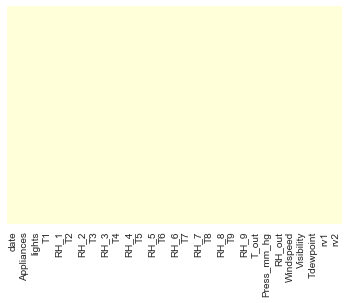

In [4]:
sns.heatmap(complete_data.isnull(),yticklabels=False,cbar=False,cmap='YlGnBu')
complete_data.isnull().sum()

# Analysis

----

We are checking any __`null`__ values in the dataset and we find that there is no null value in the dataset.

In [5]:
complete_data.describe()

Appliances    lights        T1      RH_1        T2      RH_2        T3  \
count   19735.000 19735.000 19735.000 19735.000 19735.000 19735.000 19735.000   
mean       97.695     3.802    21.687    40.260    20.341    40.420    22.268   
std       102.525     7.936     1.606     3.979     2.193     4.070     2.006   
min        10.000     0.000    16.790    27.023    16.100    20.463    17.200   
25%        50.000     0.000    20.760    37.333    18.790    37.900    20.790   
50%        60.000     0.000    21.600    39.657    20.000    40.500    22.100   
75%       100.000     0.000    22.600    43.067    21.500    43.260    23.290   
max      1080.000    70.000    26.260    63.360    29.857    56.027    29.236   

           RH_3        T4      RH_4  ...        T9      RH_9     T_out  \
count 19735.000 19735.000 19735.000  ... 19735.000 19735.000 19735.000   
mean     39.243    20.855    39.027  ...    19.486    41.552     7.412   
std       3.255     2.043     4.341  ...     2.015     4.151     5.317   
min      28.767    15.100    27.660  ...    14.890    29.167    -5.000   
25%      36.900    19.530    35.530  ...    18.000    38.500     3.667   
50%      38.530    20.667    38.400  ...    19.390    40.900     6.917   
75%      41.760    22.100    42.157  ...    20.600    44.338    10.408   
max      50.163    26.200    51.090  ...    24.500    53.327    26.100   

       Press_mm_hg    RH_out  Windspeed  Visibility  Tdewpoint       rv1  \
count    19735.000 19735.000  19735.000   19735.000  19735.000 19735.000   
mean       755.523    79.750      4.040      38.331      3.761    24.988   
std          7.399    14.901      2.451      11.795      4.195    14.497   
min        729.300    24.000      0.000       1.000     -6.600     0.005   
25%        750.933    70.333      2.000      29.000      0.900    12.498   
50%        756.100    83.667      3.667      40.000      3.433    24.898   
75%        760.933    91.667      5.500      40.000      6.567    37.584   
max        772.300   100.000     14.000      66.000     15.500    49.997   

            rv2  
count 19735.000  
mean     24.988  
std      14.497  
min       0.005  
25%      12.498  
50%      24.898  
75%      37.584  
max      49.997  

[8 rows x 28 columns]

# Analysis

----

We are checking the statistical variables of the dataset such as __`count, mean (average), standard deviation`__ ,many more.

#  Analysis begins on `energy data`

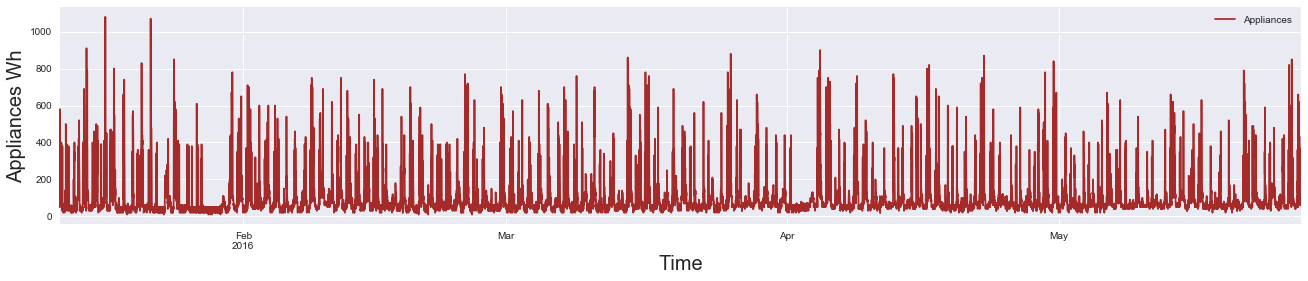

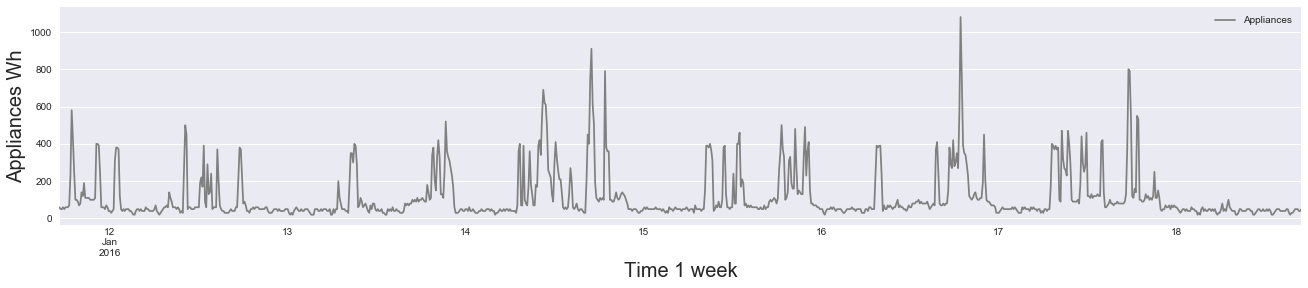

In [6]:
date_appliances_data=complete_data[["date","Appliances"]]
date_appliances_data.plot(kind='line',x='date', y='Appliances',color='brown')
plt.xlabel("Time" ,size =20)
plt.ylabel("Appliances Wh" , size =20)
plt.subplots_adjust(right=3)

#1st week data
date_appliances_data[1:1008].plot(kind='line',x='date', y='Appliances',color='grey')
plt.xlabel("Time 1 week",size =20)
plt.ylabel("Appliances Wh",size =20)
plt.subplots_adjust(right=3)

# Analysis

----

There are two line graphs plotted, __`first`__ is depicting the whole data between appliances and date. Whereas, __`second graph`__ illustrates one week usage of appliances. Highest amount of energy consumed between 15th and 16th of January.

Text(0, 0.5, 'Frequency')

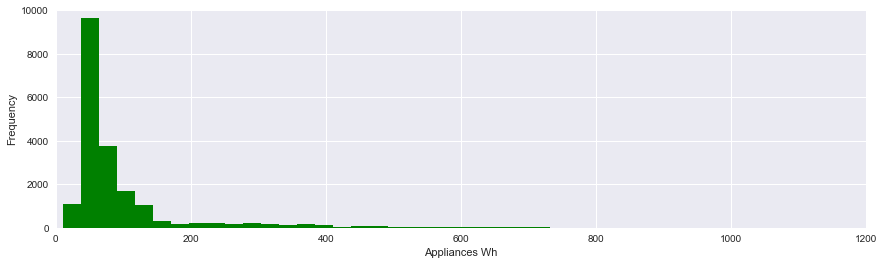

In [7]:
date_appliances_data['Appliances'].plot.hist(bins=40,grid=True,color='green') 
plt.subplots_adjust(right=2)
plt.xlim([0,1200])
plt.xlabel("Appliances Wh")
plt.ylim(0,10000)
plt.ylabel("Frequency")

# Analysis

----

Histogram plot depicts the appliances usage with frequency on the y axis of range 0,1000 . We can assume that the distribution is __`skewed`__ because tail is tilted towards the right.

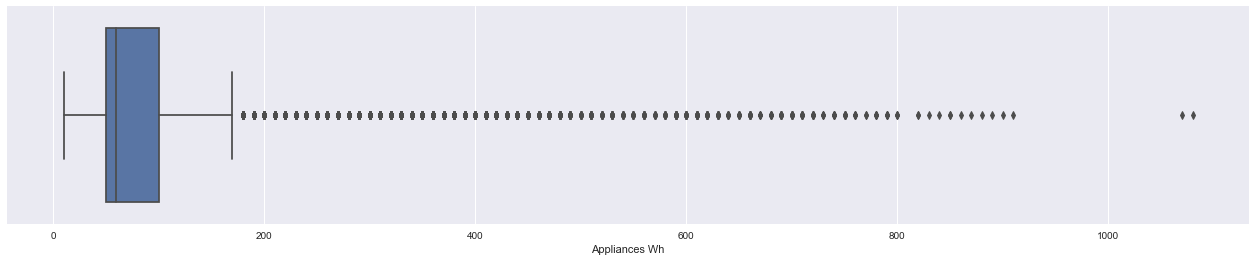

In [8]:
ax = sns.boxplot(x=date_appliances_data["Appliances"])
plt.xlabel("Appliances Wh")
plt.subplots_adjust(right=3)
plt.show()

# Analysis

As the above boxplot depicts there are many __`outliers`__ in the data, it means there are plenty of values are outside of the range.

# Energy complete has been divided into training and testing dataset for the further analysis.

In [9]:
train_data = pd.read_csv('data/energydata_training.csv' ,index_col='date')
print ("Shape of the training dataset is : ",train_data.shape)
train_data.head()

Shape of the training dataset is :  (14803, 31)


Appliances  lights     T1   RH_1     T2   RH_2     T3  \
date                                                                         
2016-01-11 17:00:00          60      30 19.890 47.597 19.200 44.790 19.790   
2016-01-11 17:10:00          60      30 19.890 46.693 19.200 44.722 19.790   
2016-01-11 17:20:00          50      30 19.890 46.300 19.200 44.627 19.790   
2016-01-11 17:40:00          60      40 19.890 46.333 19.200 44.530 19.790   
2016-01-11 17:50:00          50      40 19.890 46.027 19.200 44.500 19.790   

                      RH_3     T4   RH_4  ...  Press_mm_hg  RH_out  Windspeed  \
date                                      ...                                   
2016-01-11 17:00:00 44.730 19.000 45.567  ...      733.500  92.000      7.000   
2016-01-11 17:10:00 44.790 19.000 45.992  ...      733.600  92.000      6.667   
2016-01-11 17:20:00 44.933 18.927 45.890  ...      733.700  92.000      6.333   
2016-01-11 17:40:00 45.000 18.890 45.530  ...      733.900  92.000      5.667   
2016-01-11 17:50:00 44.933 18.890 45.730  ...      734.000  92.000      5.333   

                     Visibility  Tdewpoint    rv1    rv2    NSM  WeekStatus  \
date                                                                          
2016-01-11 17:00:00      63.000      5.300 13.275 13.275  61200     Weekday   
2016-01-11 17:10:00      59.167      5.200 18.606 18.606  61800     Weekday   
2016-01-11 17:20:00      55.333      5.100 28.643 28.643  62400     Weekday   
2016-01-11 17:40:00      47.667      4.900 10.084 10.084  63600     Weekday   
2016-01-11 17:50:00      43.833      4.800 44.919 44.919  64200     Weekday   

                     Day_of_week  
date                              
2016-01-11 17:00:00       Monday  
2016-01-11 17:10:00       Monday  
2016-01-11 17:20:00       Monday  
2016-01-11 17:40:00       Monday  
2016-01-11 17:50:00       Monday  

[5 rows x 31 columns]

# Analysis

----

We are reading the __`training`__ dataset and it has shape __14803 * 31__ (i.e., 14803 rows and 31 columns).

In [10]:
train_data.describe()

Appliances    lights        T1      RH_1        T2      RH_2        T3  \
count   14803.000 14803.000 14803.000 14803.000 14803.000 14803.000 14803.000   
mean       98.011     3.803    21.684    40.271    20.343    40.418    22.263   
std       102.828     7.940     1.608     3.982     2.192     4.066     2.014   
min        10.000     0.000    16.790    27.023    16.100    20.893    17.200   
25%        50.000     0.000    20.730    37.362    18.823    37.900    20.790   
50%        60.000     0.000    21.600    39.657    20.000    40.500    22.100   
75%       100.000     0.000    22.600    43.090    21.500    43.290    23.290   
max      1080.000    50.000    26.260    63.360    29.857    56.027    29.236   

           RH_3        T4      RH_4  ...      RH_9     T_out  Press_mm_hg  \
count 14803.000 14803.000 14803.000  ... 14803.000 14803.000    14803.000   
mean     39.249    20.855    39.030  ...    41.542     7.413      755.503   
std       3.253     2.045     4.340  ...     4.151     5.324        7.428   
min      28.767    15.100    27.660  ...    29.167    -5.000      729.300   
25%      36.900    19.500    35.530  ...    38.500     3.667      750.867   
50%      38.530    20.667    38.400  ...    40.863     6.900      756.100   
75%      41.762    22.100    42.130  ...    44.363    10.400      760.933   
max      50.163    26.200    51.063  ...    53.327    25.967      772.300   

         RH_out  Windspeed  Visibility  Tdewpoint       rv1       rv2  \
count 14803.000  14803.000   14803.000  14803.000 14803.000 14803.000   
mean     79.734      4.034      38.330      3.757    25.078    25.078   
std      14.956      2.437      11.813      4.200    14.482    14.482   
min      24.000      0.000       1.000     -6.600     0.005     0.005   
25%      70.000      2.000      29.000      0.900    12.580    12.580   
50%      83.667      3.667      40.000      3.450    25.044    25.044   
75%      91.667      5.500      40.000      6.533    37.666    37.666   
max     100.000     13.500      66.000     15.500    49.997    49.997   

            NSM  
count 14803.000  
mean  42985.989  
std   24968.649  
min       0.000  
25%   21600.000  
50%   43200.000  
75%   64800.000  
max   85800.000  

[8 rows x 29 columns]

# Analysis

----

We are exploring the __`training dataset`__ with its statisical values .

In [11]:
test_data = pd.read_csv('data/energydata_testing.csv' ,index_col='date')
print ("Shape of the testing dataset is : ",train_data.shape)
test_data.head()

Shape of the testing dataset is :  (14803, 31)


Appliances  lights     T1   RH_1     T2   RH_2     T3  \
date                                                                         
2016-01-11 17:30:00          50      40 19.890 46.067 19.200 44.590 19.790   
2016-01-11 18:00:00          60      50 19.890 45.767 19.200 44.500 19.790   
2016-01-11 18:40:00         230      70 19.927 45.863 19.357 44.400 19.790   
2016-01-11 18:50:00         580      60 20.067 46.397 19.427 44.400 19.790   
2016-01-11 19:30:00         100      10 20.567 53.893 20.033 46.757 20.100   

                      RH_3     T4   RH_4  ...  Press_mm_hg  RH_out  Windspeed  \
date                                      ...                                   
2016-01-11 17:30:00 45.000 18.890 45.723  ...      733.800  92.000      6.000   
2016-01-11 18:00:00 44.900 18.890 45.790  ...      734.100  92.000      5.000   
2016-01-11 18:40:00 44.900 18.890 46.430  ...      734.367  91.333      5.667   
2016-01-11 18:50:00 44.827 19.000 46.430  ...      734.433  91.167      5.833   
2016-01-11 19:30:00 48.467 19.000 48.490  ...      734.850  89.500      6.000   

                     Visibility  Tdewpoint    rv1    rv2    NSM  WeekStatus  \
date                                                                          
2016-01-11 17:30:00      51.500      5.000 45.410 45.410  63000     Weekday   
2016-01-11 18:00:00      40.000      4.700 47.234 47.234  64800     Weekday   
2016-01-11 18:40:00      40.000      4.633 10.299 10.299  67200     Weekday   
2016-01-11 18:50:00      40.000      4.617  8.828  8.828  67800     Weekday   
2016-01-11 19:30:00      40.000      4.350 24.885 24.885  70200     Weekday   

                     Day_of_week  
date                              
2016-01-11 17:30:00       Monday  
2016-01-11 18:00:00       Monday  
2016-01-11 18:40:00       Monday  
2016-01-11 18:50:00       Monday  
2016-01-11 19:30:00       Monday  

[5 rows x 31 columns]

# Analysis

----

We are reading the __`testing`__ dataset and it has shape __14803 * 31__ (i.e., 14803 rows and 31 columns).

In [12]:
test_data.describe()

Appliances   lights       T1     RH_1       T2     RH_2       T3  \
count    4932.000 4932.000 4932.000 4932.000 4932.000 4932.000 4932.000   
mean       96.746    3.800   21.694   40.225   20.337   40.428   22.283   
std       101.614    7.924    1.601    3.972    2.197    4.081    1.983   
min        10.000    0.000   16.790   27.430   16.100   20.463   17.200   
25%        50.000    0.000   20.766   37.290   18.790   37.900   20.790   
50%        60.000    0.000   21.600   39.660   20.000   40.500   22.100   
75%       100.000    0.000   22.667   42.975   21.500   43.161   23.367   
max      1070.000   70.000   26.260   56.393   29.667   54.767   29.100   

          RH_3       T4     RH_4  ...     RH_9    T_out  Press_mm_hg   RH_out  \
count 4932.000 4932.000 4932.000  ... 4932.000 4932.000     4932.000 4932.000   
mean    39.223   20.855   39.017  ...   41.583    7.408      755.581   79.799   
std      3.260    2.037    4.346  ...    4.154    5.299        7.314   14.738   
min     30.927   15.100   28.857  ...   29.167   -4.956      729.500   25.000   
25%     36.863   19.567   35.500  ...   38.626    3.700      751.050   70.833   
50%     38.530   20.600   38.400  ...   41.000    6.950      756.100   83.667   
75%     41.760   22.100   42.171  ...   44.290   10.417      760.900   91.500   
max     50.090   26.200   51.090  ...   53.327   26.100      772.283  100.000   

       Windspeed  Visibility  Tdewpoint      rv1      rv2       NSM  
count   4932.000    4932.000   4932.000 4932.000 4932.000  4932.000  
mean       4.056      38.333      3.772   24.718   24.718 42670.438  
std        2.494      11.742      4.178   14.540   14.540 24854.921  
min        0.000       1.000     -6.500    0.014    0.014     0.000  
25%        2.000      29.000      0.913   12.339   12.339 21000.000  
50%        3.667      40.000      3.400   24.491   24.491 42000.000  
75%        5.500      40.000      6.683   37.375   37.375 64200.000  
max       14.000      66.000     15.317   49.993   49.993 85800.000  

[8 rows x 29 columns]

# Analysis

----

We are exploring the __`testing dataset`__ with its statisical values .

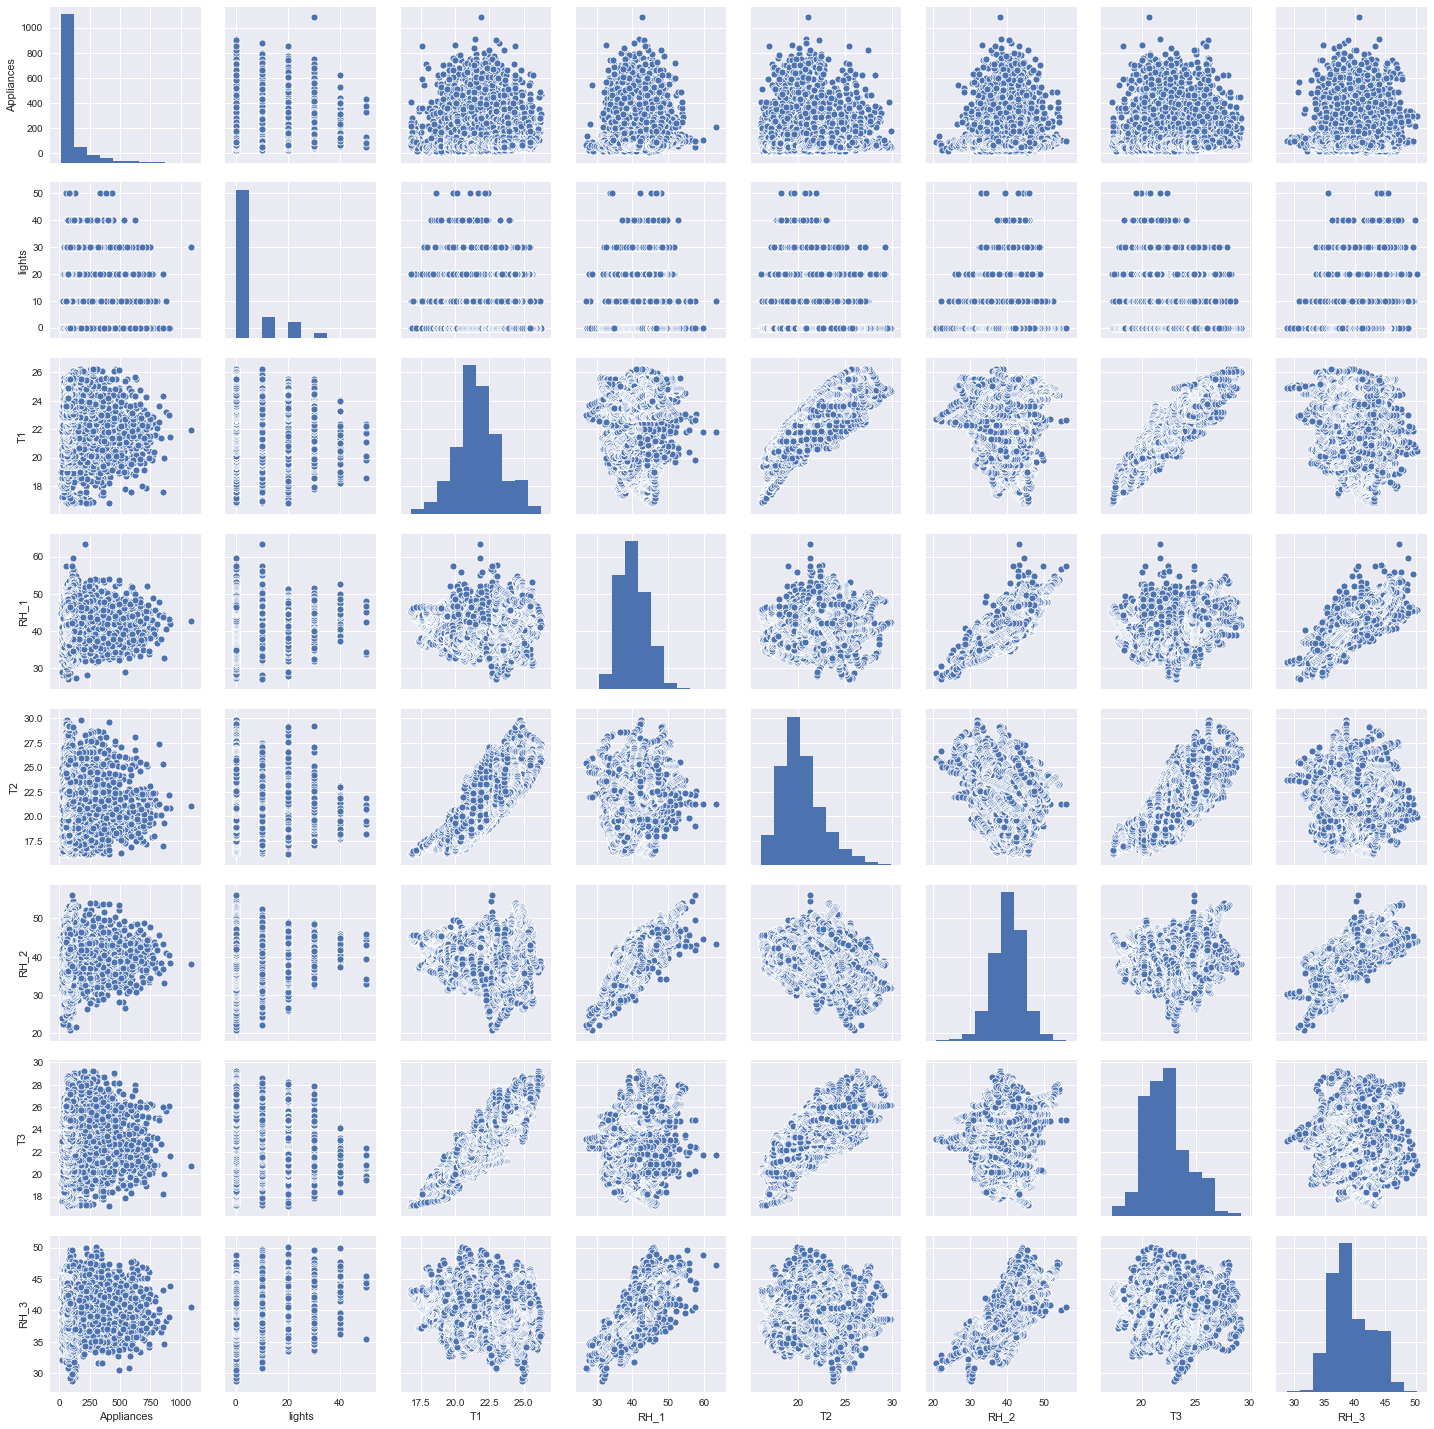

In [13]:
train_data_corr =train_data [["Appliances", "lights","T1","RH_1","T2","RH_2","T3","RH_3"]]
sns.pairplot(train_data_corr)

# Analysis

----

Plotting the `first pairplot` by using the `training data` between `"Appliances", "lights","T1","RH_1","T2","RH_2","T3" and "RH_3`. From this pairplot, we can make below conclusions :

1. There is a positive correlation between Appliances and lights.
2. There is a positive correlation between T1 and T3.

In [14]:
train_data_corr=train_data_corr.corr()
train_data_corr

Appliances  lights     T1  RH_1     T2   RH_2     T3   RH_3
Appliances       1.000   0.195  0.060 0.087  0.125 -0.061  0.093  0.037
lights           0.195   1.000 -0.028 0.113 -0.012  0.059 -0.099  0.135
T1               0.060  -0.028  1.000 0.167  0.838  0.001  0.893 -0.026
RH_1             0.087   0.113  0.167 1.000  0.273  0.798  0.257  0.845
T2               0.125  -0.012  0.838 0.273  1.000 -0.161  0.736  0.123
RH_2            -0.061   0.059  0.001 0.798 -0.161  1.000  0.142  0.681
T3               0.093  -0.099  0.893 0.257  0.736  0.142  1.000 -0.008
RH_3             0.037   0.135 -0.026 0.845  0.123  0.681 -0.008  1.000

# Analysis

----

Above piece of code shows the correlation matrix between various variables. It is similar to the pairplot , only difference is the pairplot visualize correlation with graphs whereas correlation matrix illustrates matrix.

In [15]:
complete_data['day_name'] = complete_data['date'].dt.weekday_name;
complete_data['hour'] = complete_data['date'].dt.hour;

# Analysis

----

We are creating two new variables , assigining __`weekday name`__ to __`day_name`__ column and __`hour`__ to __`hour`__ column.

In [16]:
Firstmon = complete_data.loc[(complete_data.date >= '2016-01-01') & (complete_data.date <= '2016-01-28')]
Secondmon = complete_data.loc[(complete_data.date >= '2016-02-01') & (complete_data.date <= '2016-02-28')]
Thirdmon = complete_data.loc[(complete_data.date >= '2016-03-01') & (complete_data.date <= '2016-03-28')]
Fourthmon = complete_data.loc[(complete_data.date >= '2016-04-01') & (complete_data.date <= '2016-04-28')]

# Analysis

----

We are splitting data based on months such as __`first , second , third and fourth`__.

In [17]:
Firstmonv2  = pd.pivot_table(Firstmon[['day_name','hour','Appliances']],index=['day_name','hour'],aggfunc='sum')
Secondmonv2 = pd.pivot_table(Secondmon[['day_name','hour','Appliances']],index=['day_name','hour'],aggfunc='sum')
Thirdmonv2  = pd.pivot_table(Thirdmon[['day_name','hour','Appliances']],index=['day_name','hour'],aggfunc='sum')
Fourthmonv2 = pd.pivot_table(Fourthmon[['day_name','hour','Appliances']],index=['day_name','hour'],aggfunc='sum')

# Analysis

----

We are creating a new pivot table for each month with __`day_name`__ and __`hour`__.

In [18]:
Firstmonv3  =Firstmonv2.unstack(level=0)
Secondmonv3 =Secondmonv2.unstack(level=0)
Thirdmonv3  =Thirdmonv2.unstack(level=0)
Fourthmonv3 =Fourthmonv2.unstack(level=0)

# Analysis

----

Above piece of code is unstacking the data frames.


In [19]:
Firstmonv3  = Firstmonv3.reindex(labels=['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'],axis=1,level=1)
Secondmonv3 = Secondmonv3.reindex(labels=['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'],axis=1,level=1)
Thirdmonv3  = Thirdmonv3.reindex(labels=['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'],axis=1,level=1)
Fourthmonv3 = Fourthmonv3.reindex(labels=['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'],axis=1,level=1)

# Analysis

----

We are ordering the labels in the order.

In [20]:
day_short_names = ['Sun','Mon','Tues','Wed','Thurs','Fri','Sat']

# Analysis

----

We are assinging the shorter names for the weekdays.

[Text(25.0, 0.5, 'Hour of Day'), Text(0.5, 115.0, 'Day of the Week')]

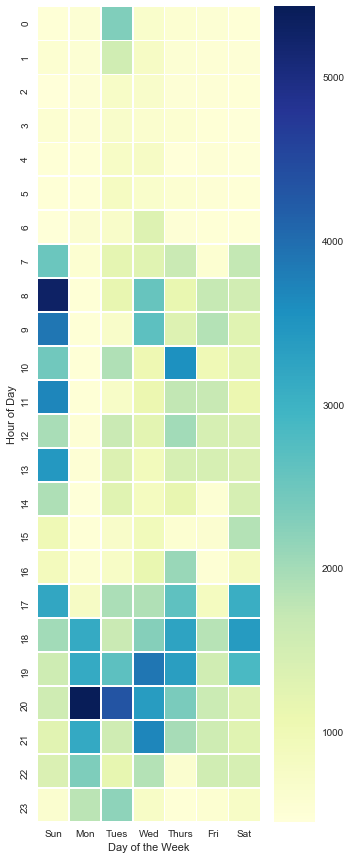

In [21]:
f,ax =plt.subplots(figsize=(5,15))
ax=sns.heatmap(Firstmonv3,cmap="YlGnBu",linewidths=.5, xticklabels=day_short_names)
ax.set(xlabel = 'Day of the Week',ylabel='Hour of Day')

# Analysis

---

### 1st week heatmap

Aformentioned code is creating a heatmap for the first week to depicts the trends of the energy consumption in a day.We can conclude that energy consumption is highest during the evening time of the day.

[Text(25.0, 0.5, 'Hour of Day'), Text(0.5, 115.0, 'Day of the Week')]

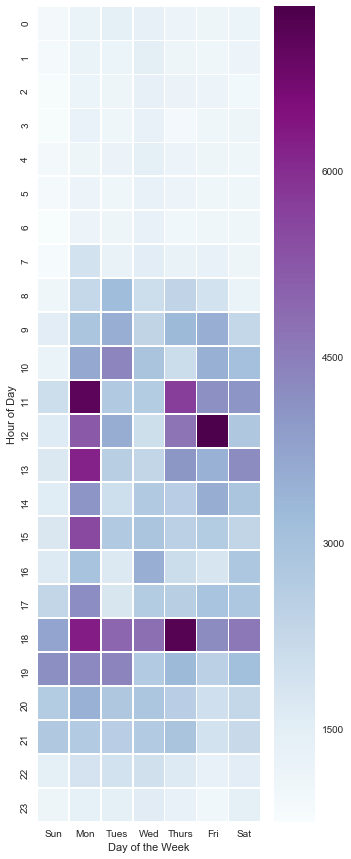

In [22]:
f,ax =plt.subplots(figsize=(5,15))
ax=sns.heatmap(Secondmonv3,cmap="BuPu",linewidths=.5, xticklabels=day_short_names)
ax.set(xlabel = 'Day of the Week',ylabel='Hour of Day')

# Analysis

---

### 2nd Week heatmap

Aformentioned code is creating a heatmap for the second week to depicts the trends of the energy consumption in a day.We can conclude that energy consumption is highest at the 1800 hours.

[Text(25.0, 0.5, 'Hour of Day'), Text(0.5, 115.0, 'Day of the Week')]

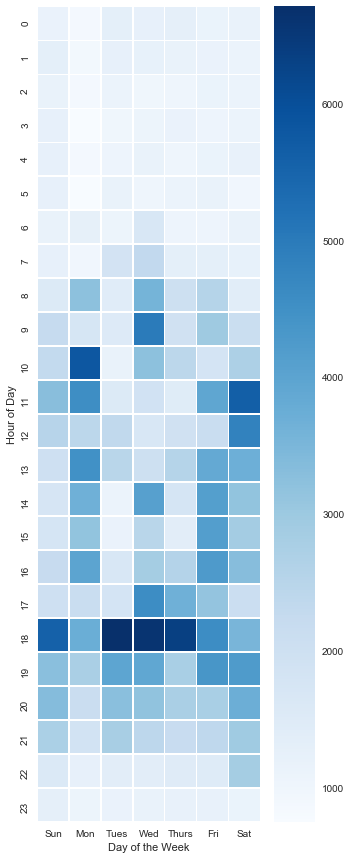

In [23]:
f,ax =plt.subplots(figsize=(5,15))
ax=sns.heatmap(Thirdmonv3,cmap="Blues",linewidths=.5, xticklabels=day_short_names)
ax.set(xlabel = 'Day of the Week',ylabel='Hour of Day')

# Analysis

---

### 3rd Week heatmap

Aformentioned code is creating a heatmap for the third week to depicts the trends of the energy consumption in a day.We can conclude that energy consumption is highest between 10000 hours and 11oo hours , during 1800 hours throughout the week.

[Text(25.0, 0.5, 'Hour of Day'), Text(0.5, 115.0, 'Day of the Week')]

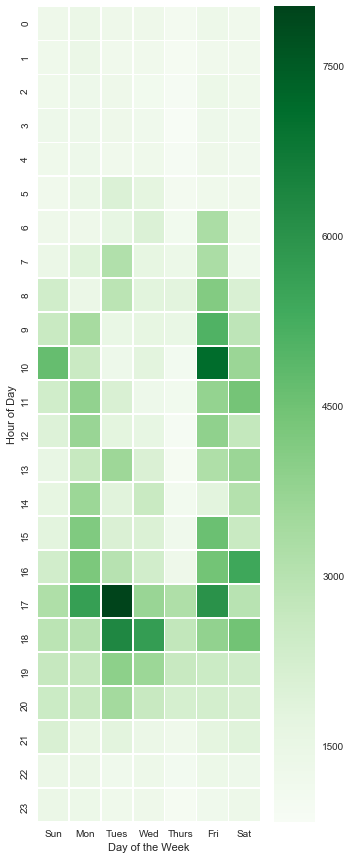

In [24]:
f,ax =plt.subplots(figsize=(5,15))
ax=sns.heatmap(Fourthmonv3,cmap="Greens",linewidths=.5, xticklabels=day_short_names)
ax.set(xlabel = 'Day of the Week',ylabel='Hour of Day')

# Analysis

---

### 4th Week heatmap

Aformentioned code is creating a heatmap for the fourth week to depicts the trends of the energy consumption in a day.We can conclude that energy consumption is highest at 10000 hours on friday and 1700 hours on tuesday.

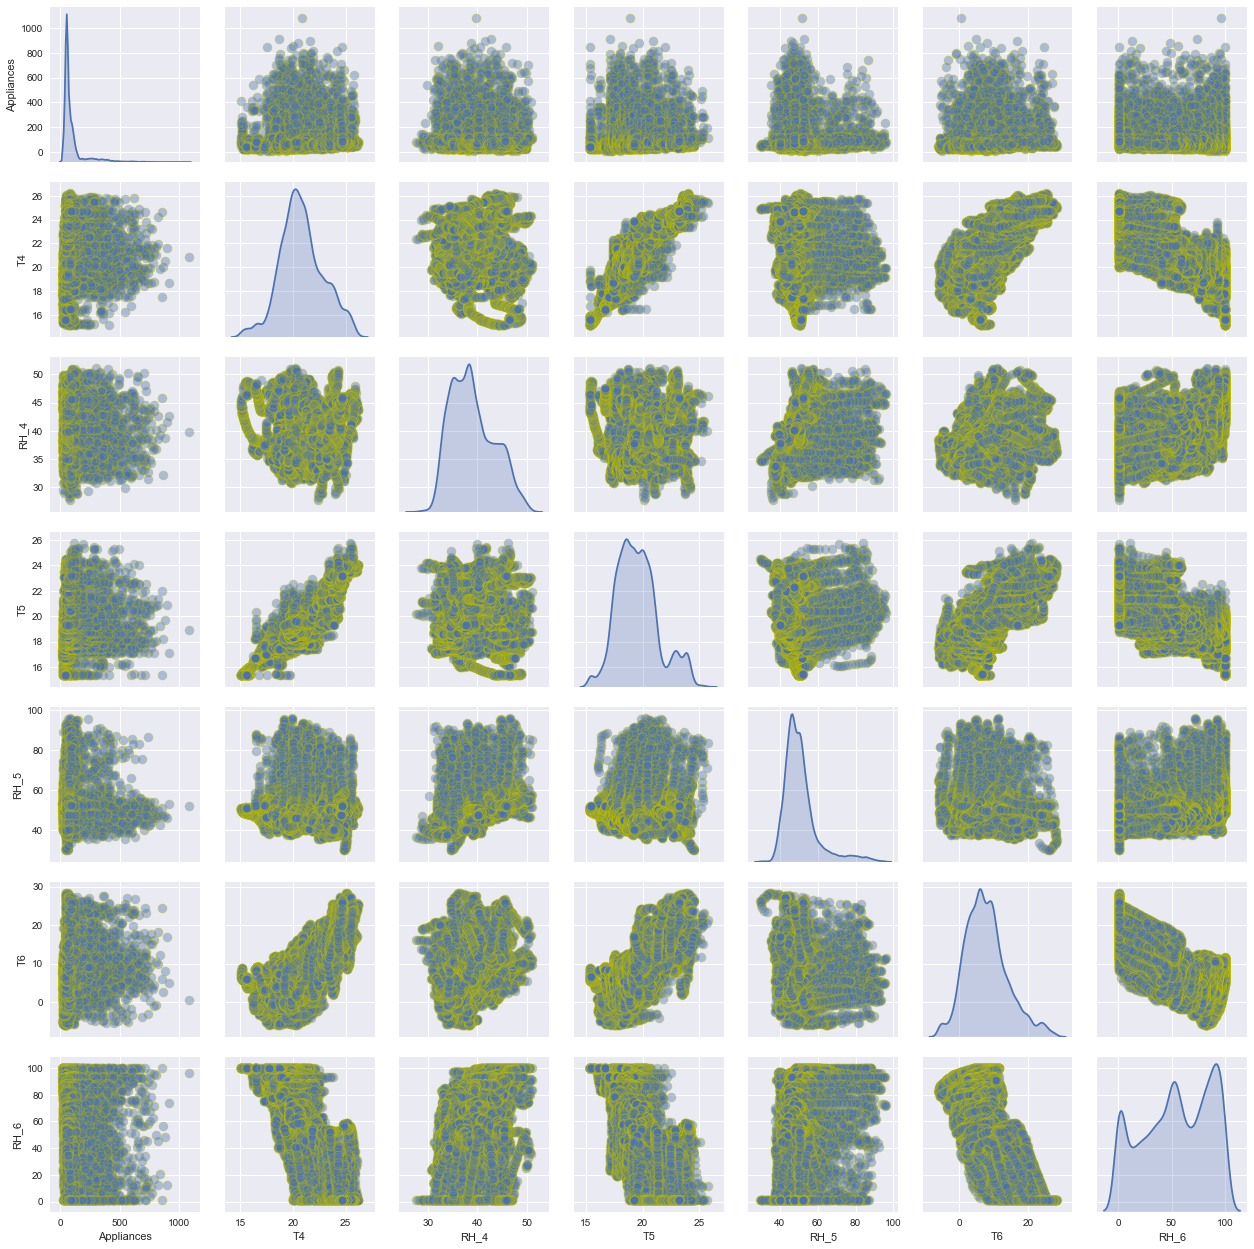

In [25]:
train_data_corr2 =train_data [["Appliances", "T4", "RH_4","T5", "RH_5", "T6", "RH_6"]]
sns.pairplot(train_data_corr2,diag_kind = 'kde',plot_kws = {'alpha': 0.4, 's': 80, 'edgecolor': 'y'})

# Analysis

----

Plotting the __`second pairplot`__ by using the __`training data`__ between the columns __`Appliances,T4,RH_4,T5,RH_5,T6,RH_6`__
We can draw the below conclusions from this plot:

1. There is a high correlation between Appliances and outdoor temperature (T6).
2. There is a negative correlation between Appliances and outdoor humidity (RH6).

In [26]:
train_data_corr2.corr()

Appliances     T4   RH_4     T5   RH_5     T6   RH_6
Appliances       1.000  0.047  0.016  0.023  0.006  0.122 -0.087
T4               0.047  1.000 -0.045  0.871 -0.077  0.656 -0.702
RH_4             0.016 -0.045  1.000  0.093  0.353  0.260  0.391
T5               0.023  0.871  0.093  1.000  0.033  0.630 -0.631
RH_5             0.006 -0.077  0.353  0.033  1.000 -0.081  0.267
T6               0.122  0.656  0.260  0.630 -0.081  1.000 -0.672
RH_6            -0.087 -0.702  0.391 -0.631  0.267 -0.672  1.000

# Analysis

----

Above piece of code shows the correlation matrix between various variables. It is similar to the pairplot , only difference is the pairplot visualize correlation with graphs whereas correlation matrix illustrates matrix.

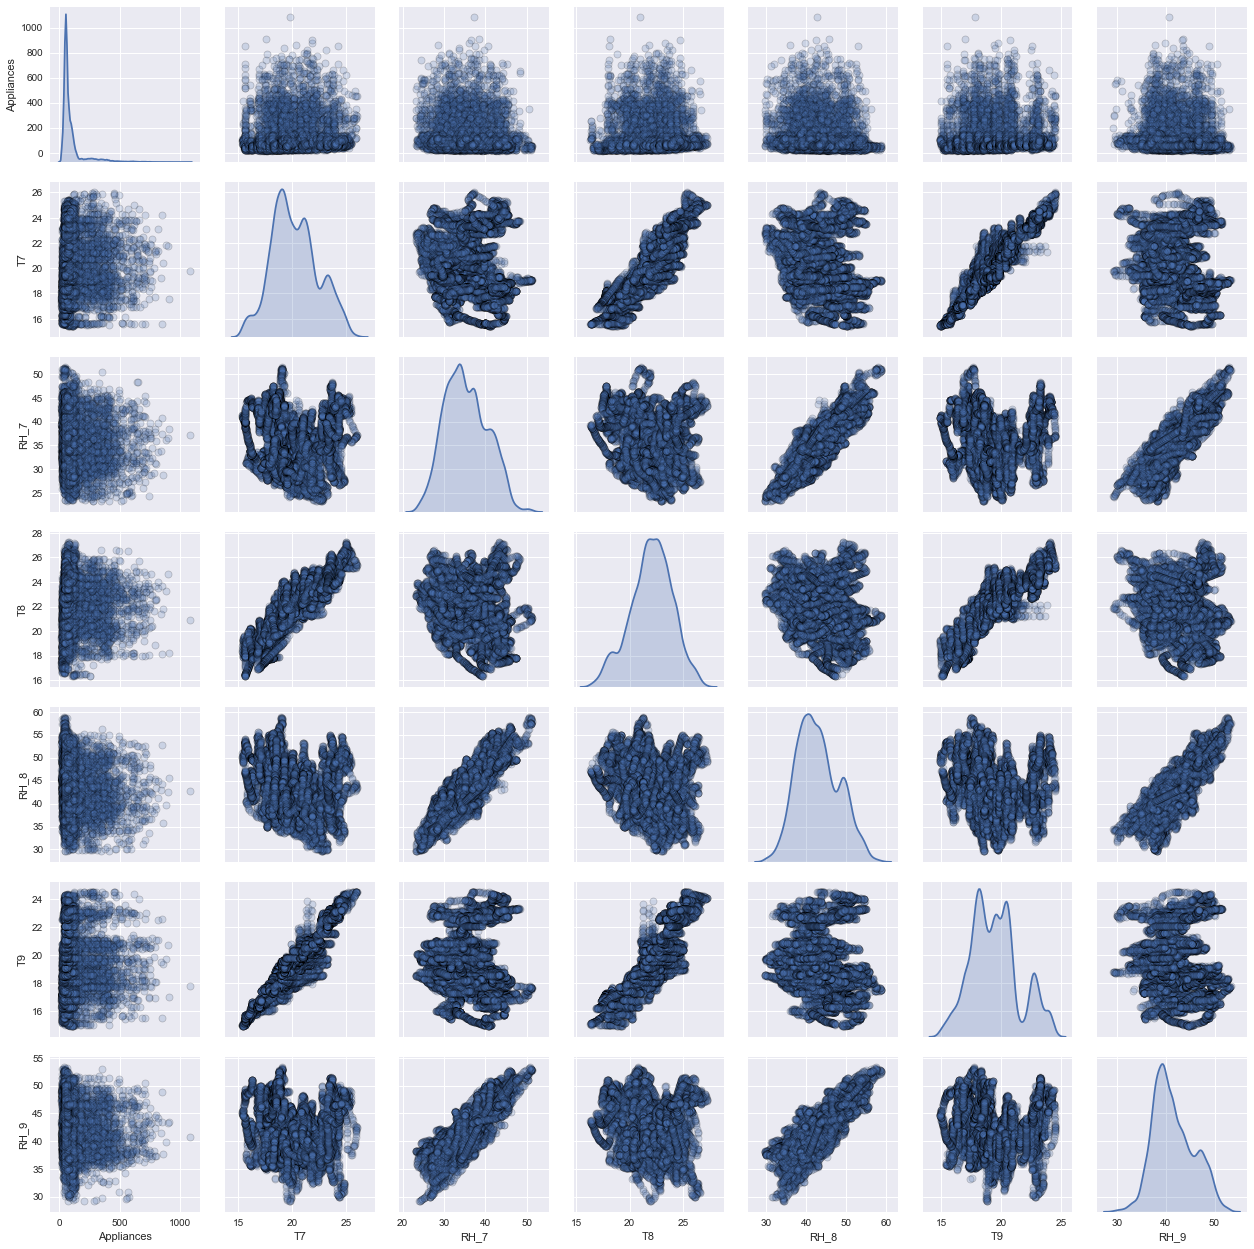

In [27]:
train_data_corr3 =train_data [["Appliances", "T7", "RH_7","T8", "RH_8", "T9","RH_9"]]
sns.pairplot(train_data_corr3,diag_kind = 'kde',plot_kws = {'alpha': 0.2, 's': 50, 'edgecolor': 'k'})

# Analysis

Pairplot shows the correlation between various variables and to make it more understandable. T7 has low correlation with __`RH_7`__ , __`RH_8`__ and __`RH_9`__ where __`Appliances`__ has low correlation with __`RH_7`__ and __`RH_8`__ and __`RH_9`__.

In [28]:
train_data_corr3.corr()

Appliances     T7   RH_7     T8   RH_8     T9   RH_9
Appliances       1.000  0.032 -0.056  0.046 -0.094  0.016 -0.050
T7               0.032  1.000 -0.034  0.882 -0.211  0.944 -0.076
RH_7            -0.056 -0.034  1.000 -0.121  0.885  0.029  0.859
T8               0.046  0.882 -0.121  1.000 -0.209  0.869 -0.154
RH_8            -0.094 -0.211  0.885 -0.209  1.000 -0.114  0.856
T9               0.016  0.944  0.029  0.869 -0.114  1.000 -0.007
RH_9            -0.050 -0.076  0.859 -0.154  0.856 -0.007  1.000

# Analysis

----

Above piece of code shows the correlation matrix between various variables. It is similar to the pairplot , only difference is the pairplot visualize correlation with graphs whereas correlation matrix illustrates matrix.

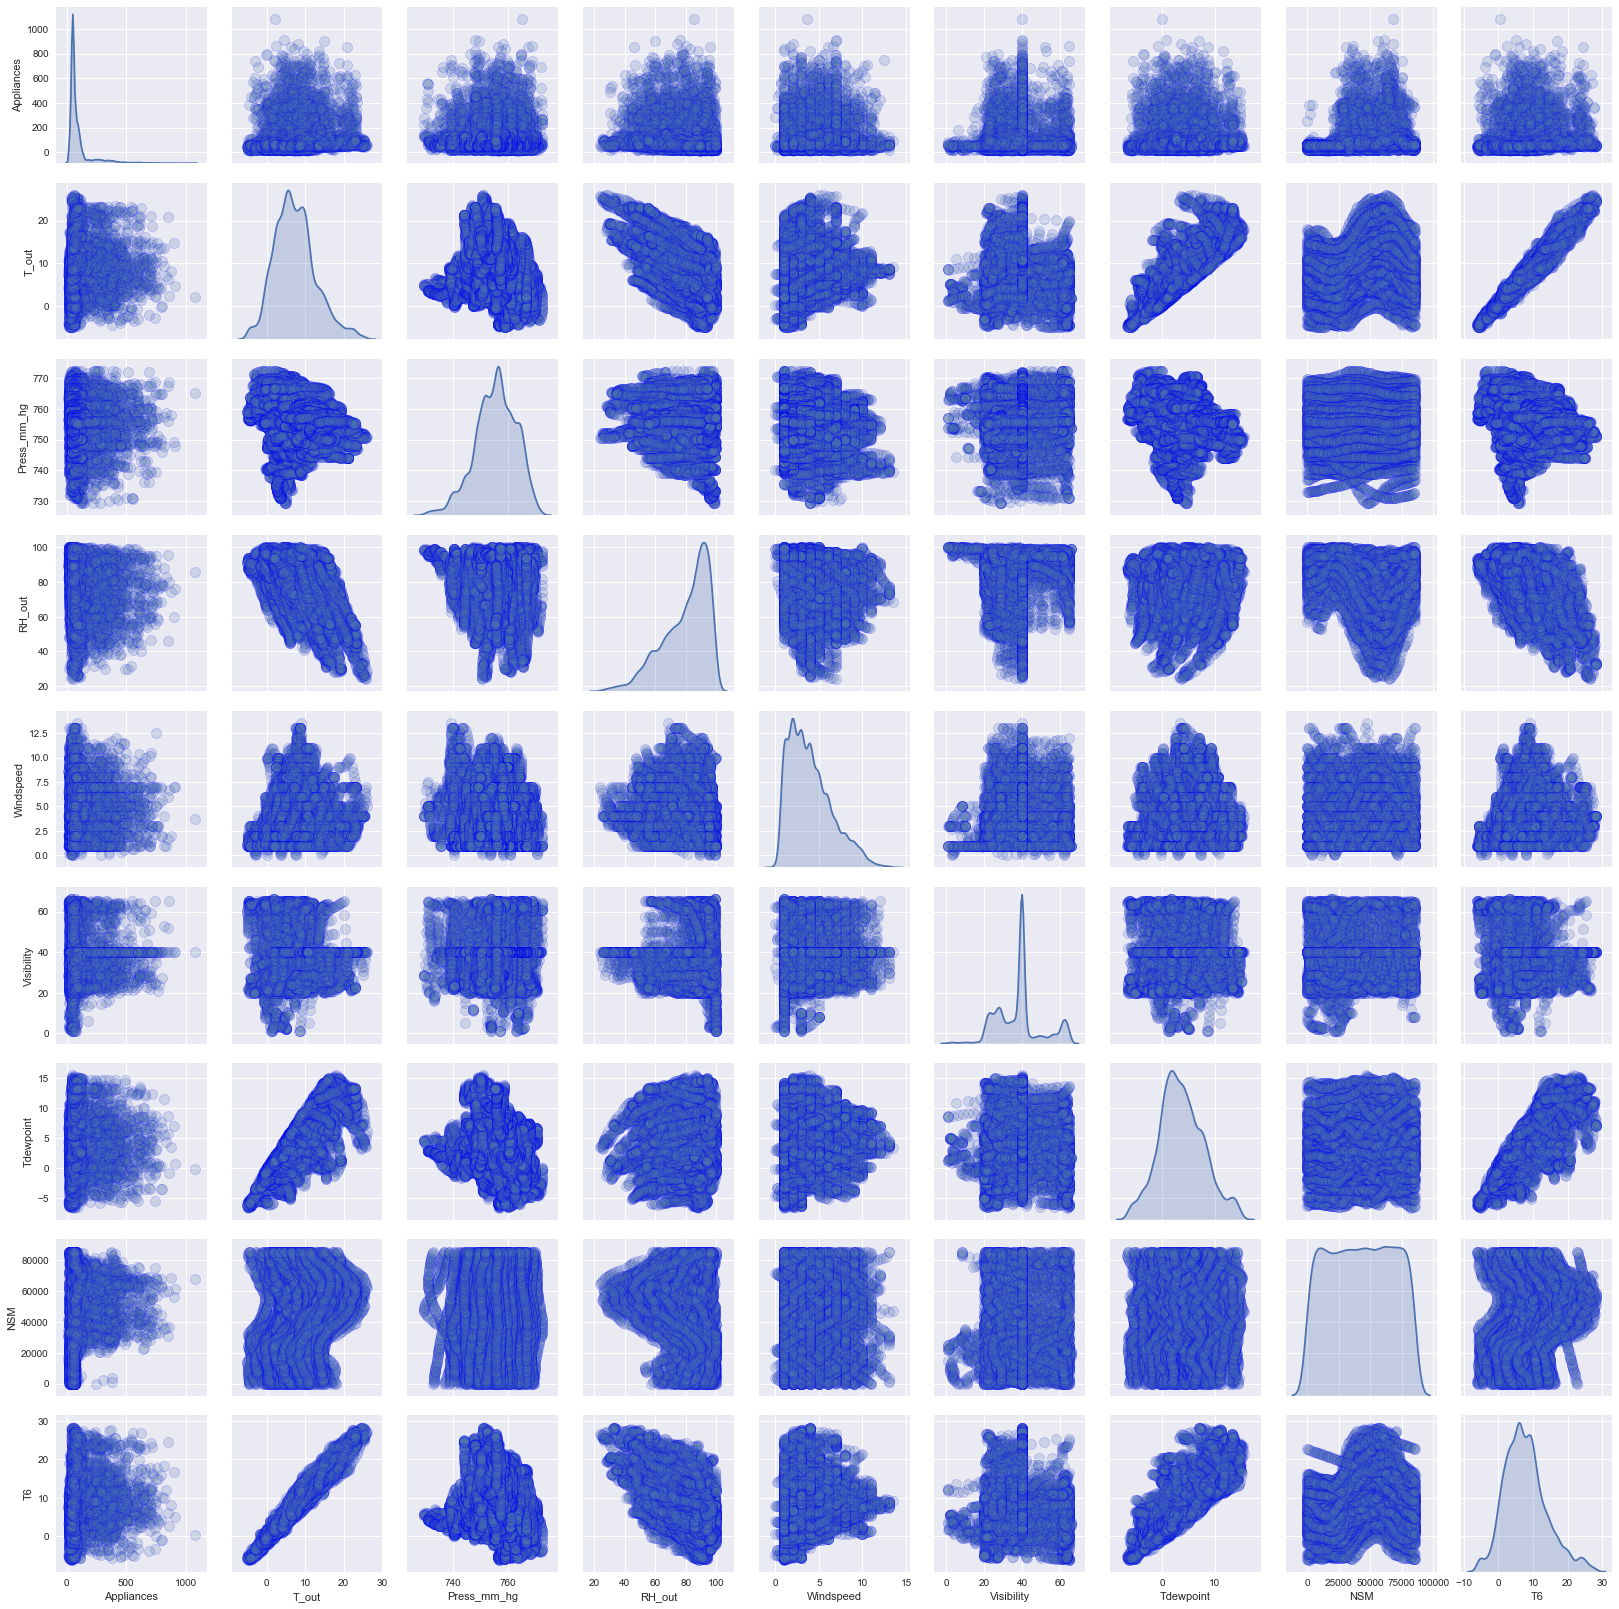

In [29]:
train_data_corr4 =train_data [["Appliances", "T_out", "Press_mm_hg", "RH_out", "Windspeed","Visibility", "Tdewpoint", "NSM","T6"]]
sns.pairplot(train_data_corr4,diag_kind = 'kde',plot_kws = {'alpha': 0.2, 's': 100, 'edgecolor': 'b'})

# Analysis

----

Pairplot shows the correlation between various variables and to make it more understandable.We can conclude that __`Appliances`__ and __`NSM`__ are highley correlated whereas it has weakest correlation with Visibility.

In [30]:
train_data_corr4.corr()

Appliances  T_out  Press_mm_hg  RH_out  Windspeed  Visibility  \
Appliances        1.000  0.104       -0.032  -0.155      0.085      -0.005   
T_out             0.104  1.000       -0.137  -0.574      0.194      -0.077   
Press_mm_hg      -0.032 -0.137        1.000  -0.099     -0.231       0.041   
RH_out           -0.155 -0.574       -0.099   1.000     -0.174       0.087   
Windspeed         0.085  0.194       -0.231  -0.174      1.000      -0.004   
Visibility       -0.005 -0.077        0.041   0.087     -0.004       1.000   
Tdewpoint         0.020  0.789       -0.241   0.039      0.128      -0.039   
NSM               0.216  0.222       -0.004  -0.344      0.100      -0.027   
T6                0.122  0.975       -0.135  -0.568      0.169      -0.082   

             Tdewpoint    NSM     T6  
Appliances       0.020  0.216  0.122  
T_out            0.789  0.222  0.975  
Press_mm_hg     -0.241 -0.004 -0.135  
RH_out           0.039 -0.344 -0.568  
Windspeed        0.128  0.100  0.169  
Visibility      -0.039 -0.027 -0.082  
Tdewpoint        1.000  0.029  0.764  
NSM              0.029  1.000  0.205  
T6               0.764  0.205  1.000

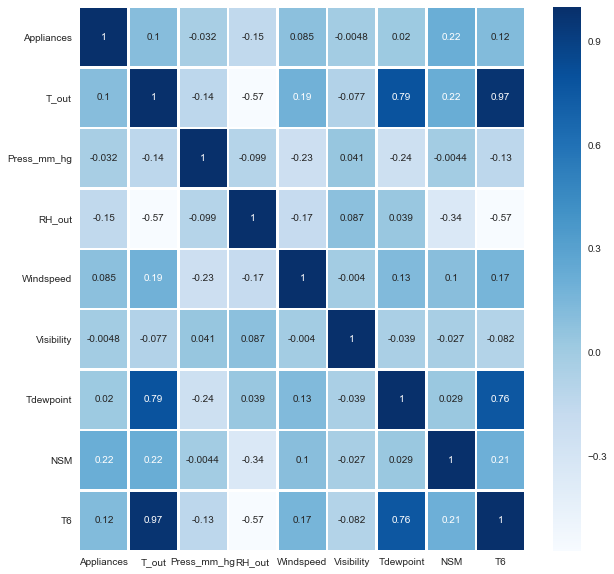

In [31]:
train_data_heatmap =plt.subplots(figsize=(10,10))
ax=sns.heatmap(train_data_corr4.corr(),cmap="Blues",linewidths=1.5,annot=True)

# Analysis

----

Visualizing correlation through the heatmap is also a good approach.

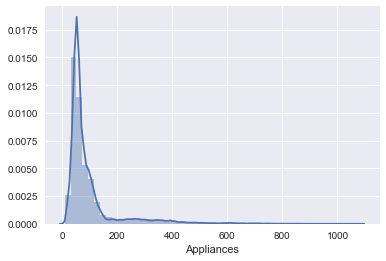

In [32]:
sns.distplot(train_data['Appliances'])

# Analysis

----

Plotting a `distplot for appliances` to draw conclusion regarding the spread of the data. From this distplot, we can conclude that data is skewed to the __`right`__.

# Training a model on Linear Regression

----

Let's begin training of data...

We first need to split the data into two arrays X,y; in which X has the variables which we train and y has target (whose value will be predicted by the trained variables.)

We will remove two columns namely `WeekStatus and Day_of_week` because both these columns are storing categorical values that the linear regression model cannot use.

In [33]:
train_data.columns

Index(['Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4',
       'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9',
       'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility',
       'Tdewpoint', 'rv1', 'rv2', 'NSM', 'WeekStatus', 'Day_of_week'],
      dtype='object')

# Analysis

----

We are checking the columns in the training dataset.

In [34]:
X_train = train_data[['lights', 
                             'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2','NSM']]
print (X_train.shape)
y_train = train_data['Appliances']
print (y_train.shape)

(14803, 28)
(14803,)


# Analysis

----

X array has only 28 columns because 2 variables are categorical type so they are dropped. We are printing the X and y arrays.

In [35]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
linear_model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# Analysis

----

We are fitting data in our __`Linear Regression Model.`__

In [36]:
print(linear_model.intercept_)
print(linear_model.coef_)

-40.03362523484286
[ 1.86660516e+00 -4.14497987e+00  1.44790183e+01 -1.78426597e+01
 -1.37115412e+01  2.76620233e+01  5.34759535e+00 -2.51528298e+00
 -7.94526199e-01 -1.50241017e+00  9.21698362e-02  7.37898919e+00
  3.26591065e-01  2.00333400e+00 -1.74131349e+00  8.10390686e+00
 -3.64205959e+00 -1.33516314e+01 -3.25454078e-01 -1.01102847e+01
  1.86447658e-01 -9.03894716e-01  1.82733594e+00  1.33901648e-01
  4.19325863e+00 -2.45927477e-02 -2.45927477e-02  2.94814485e-04]


# Analysis

----

We are calculating the Intercept and the coefficients of the training dataset.

In [37]:
coeff_df = pd.DataFrame(linear_model.coef_, X_train.columns,columns=['Coefficient'])
coeff_df

Coefficient
lights             1.867
T1                -4.145
RH_1              14.479
T2               -17.843
RH_2             -13.712
T3                27.662
RH_3               5.348
T4                -2.515
RH_4              -0.795
T5                -1.502
RH_5               0.092
T6                 7.379
RH_6               0.327
T7                 2.003
RH_7              -1.741
T8                 8.104
RH_8              -3.642
T9               -13.352
RH_9              -0.325
T_out            -10.110
Press_mm_hg        0.186
RH_out            -0.904
Windspeed          1.827
Visibility         0.134
Tdewpoint          4.193
rv1               -0.025
rv2               -0.025
NSM                0.000

# Analysis

----

Above piece of code printing the coefficient of all variables, T3 has the highest model coefficient.

In [38]:
predictions_df = linear_model.predict(X_train)

In [39]:
comparison_df= pd.DataFrame({"Appliances Actual Value": y_train, "Appliances Predicted Value": predictions_df})
comparison_df.head()

Appliances Actual Value  Appliances Predicted Value
date                                                                    
2016-01-11 17:00:00                       60                     164.094
2016-01-11 17:10:00                       60                     149.799
2016-01-11 17:20:00                       50                     145.082
2016-01-11 17:40:00                       60                     166.047
2016-01-11 17:50:00                       50                     159.361

# Analysis

----

Priniting __`actual and predicted`__ appliances values.

# Testing on the Linear Regression Model

In [40]:
X_test = test_data[['lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2','NSM']]
print (X_test.shape)
y_test = test_data['Appliances']
print (y_test.shape)

(4932, 28)
(4932,)


# Analysis

----

We first need to split the data into two arrays X,y; in which X has the variables which we train and y has target (whose value will be predicted by the trained variables.)

We will remove two columns namely `WeekStatus and Day_of_week` because both these columns are storing categorical values that the linear regression model cannot use.

In [41]:
predictions = linear_model.predict(X_test)
mse = ((y_test - linear_model.predict(X_test))**2).mean()
print("RMSE:", np.sqrt(mse))

RMSE: 93.56425120887658


# Analysis 

----

__`RMSE`__ : RMSE is a quadratic scoring rule that also calculates the average magnitude of the error. It's the square root of the average squared differences between prediction and actual observation.

In [42]:
print("MSE:", mean_squared_error(y_test, predictions))
print("R^2:", r2_score(y_test, predictions))

MSE: 8754.269104277759
R^2: 0.15199183390308568


# Analysis

----

__`MSE`__ :The Mean Squared Error (MSE) of an estimator measures the average of error squares i.e. the average squared difference between the estimated values and true value.

__`R-squared (R2)`__ : is a statistical measure that represents the proportion of the variance for a dependent variable that's explained by an independent variable or variables in a regression model

In [43]:
comparison_test_df= pd.DataFrame({"Actual Appliances' values": y_test, "Predicted Appliances' values": predictions})
comparison_test_df.head()

Actual Appliances' values  Predicted Appliances' values
date                                                                        
2016-01-11 17:30:00                         50                       159.463
2016-01-11 18:00:00                         60                       173.740
2016-01-11 18:40:00                        230                       211.456
2016-01-11 18:50:00                        580                       196.957
2016-01-11 19:30:00                        100                       189.807

Text(0, 0.5, 'Residuals')

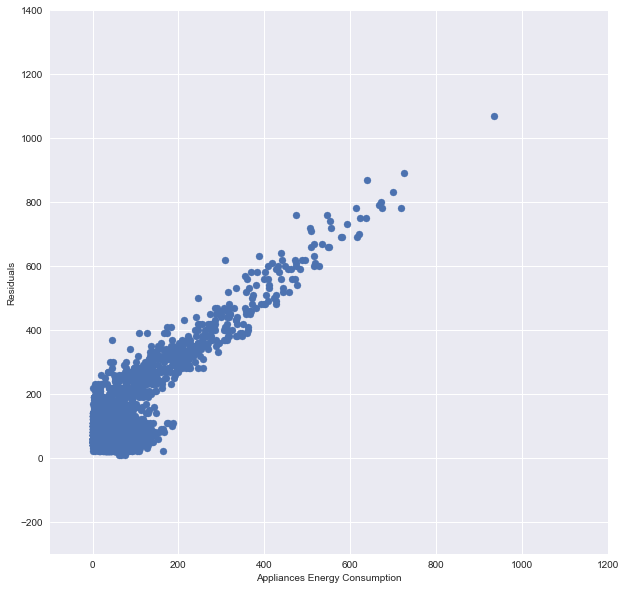

In [44]:
scatterplot =plt.subplots(figsize=(10,10))
ax=plt.scatter(abs(y_test-predictions),test_data['Appliances'])
plt.xlim([-100,1200])
plt.xlabel("Appliances Energy Consumption", size = 10)
plt.ylim(-300,1400)
plt.ylabel("Residuals", size = 10)

# Analysis

----

From the above plot, we can conclude that variables used in the linear model for the estimate are not good enough because resdiuals are not distributed around the horizontal line.

In [45]:
linear_model = LinearRegression()
rfe = RFE(linear_model, 2)
X_rfe = rfe.fit_transform(X_train,y_train)  
linear_model.fit(X_rfe,y_train)
print(rfe.support_)
print(rfe.ranking_)

[False False  True False  True False False False False False False False
 False False False False False False False False False False False False
 False False False False]
[11 12  1  2  1  3  7 10 21 17 23  8 20 15 14  5  6  4 18  9 22 19 13 24
 16 25 26 27]


# Analysis

----

From the above analysis, we can say that __`Appliances`__ value is predicted by taking all the independent columns from the data and here we got __`high MSE`__.

### We are going to use the` RFE` (i.e., Recursive Feature Elminitaion ) method to make predictions based on selected variables only.

In [46]:
nof_list=np.arange(1,28)            
high_score=0
nof=0           
score_list =[]
for n in range(len(nof_list)):
    model = LinearRegression()
    rfe = RFE(model,nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train,y_train)
    X_test_rfe = rfe.transform(X_test)
    model.fit(X_train_rfe,y_train)
    score = model.score(X_test_rfe,y_test)
    score_list.append(score)
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

Optimum number of features: 25
Score with 25 features: 0.149535


# Analysis

----

After implementing the RFE, `25 variables` are selected based on theor coefficients.

In [47]:
cols = list(X_train.columns)
model = LinearRegression()
rfe = RFE(model, 25)             
X_rfe = rfe.fit_transform(X_train,y_train)  
model.fit(X_rfe,y_train)              
temp = pd.Series(rfe.support_,index = cols)
selected_features_rfe = temp[temp==True].index
print(selected_features_rfe)

Index(['lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4', 'T5',
       'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9', 'T_out',
       'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility', 'Tdewpoint'],
      dtype='object')


# Analysis

----

Above code prints the variables selected by the RFE method.

In [48]:
X_train = train_data[['lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4', 'T5',
       'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9', 'T_out',
       'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility', 'Tdewpoint']]
print (X_train.shape)

(14803, 25)


# Analysis

----

We are keeping only required columns from the training dataset.

In [49]:
linear_model_new = LinearRegression()
linear_model_new.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [50]:
X_test = test_data[['lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4', 'T5',
       'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9', 'T_out',
       'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility', 'Tdewpoint']]
print (X_test.shape)

(4932, 25)


In [51]:
predictions = linear_model_new.predict(X_test)

In [52]:
mse = ((y_test - linear_model_new.predict(X_test))**2).mean()
print("RMSE:", np.sqrt(mse))

RMSE: 93.69971138183963


In [53]:
print("MSE:", mean_squared_error(y_test, predictions))
print("R^2:", r2_score(y_test, predictions))

MSE: 8779.635913040014
R^2: 0.14953460295416499


In [54]:
compare_df_rfe= pd.DataFrame({"Actual Appliances' values": y_test, "Predicted Appliances' values": predictions})
compare_df_rfe.head()

Actual Appliances' values  Predicted Appliances' values
date                                                                        
2016-01-11 17:30:00                         50                       158.324
2016-01-11 18:00:00                         60                       172.637
2016-01-11 18:40:00                        230                       209.879
2016-01-11 18:50:00                        580                       195.107
2016-01-11 19:30:00                        100                       191.219

# Analysis

----

Priniting __`actual and predicted`__ appliances values.

Text(0, 0.5, 'Residuals')

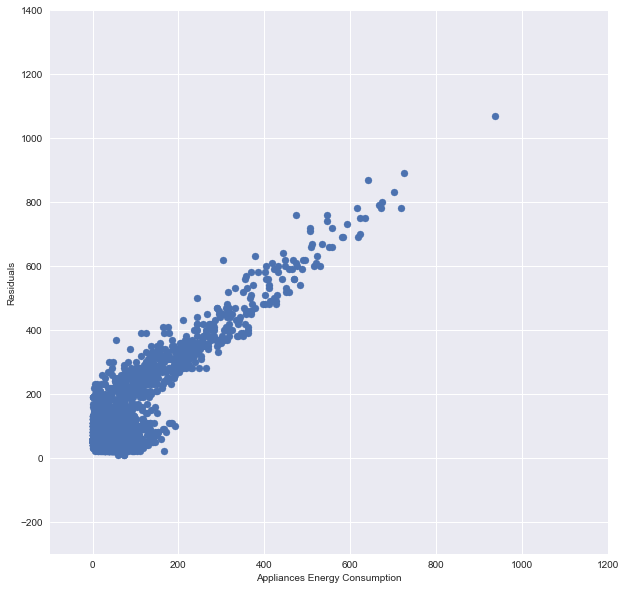

In [55]:
scatterplot =plt.subplots(figsize=(10,10))
x=plt.scatter(abs(y_test-predictions),test_data['Appliances'])
plt.xlim([-100,1200])
plt.xlabel("Appliances Energy Consumption", size = 10)
plt.ylim(-300,1400)
plt.ylabel("Residuals", size = 10)

# Conclusion

----

We can see that still the __`Mean Squared Error`__ has a quite high value even after using the Recursive feature elimination method.

We can say that a good model depends upon the number of variables used in the model.In this portfolio, model can be make better if we use significant number of variables in prediction.